# Project Objective: Loan Decision

## Module 1: DATA COLLECTION

#### Step 1.1 Import the required libraries 

In [15]:
import pandas as pd

#### Step 1.2 Load the Data as a DataFrame

In [2]:
loans = pd.read_csv("loan.csv")

### Step 2.1 Data Inspection - head(), info(), describe() etc.

In [3]:
loans.head()

,Income,Loan Amount,Default
0,15,8,No
1,30,8,No
2,5,9,Yes
3,22,10,No
4,33,12,No


In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Income       30 non-null     int64 
 1   Loan Amount  30 non-null     int64 
 2   Default      30 non-null     object
dtypes: int64(2), object(1)
memory usage: 852.0+ bytes


## Module 2: DATA EXPLORATION

**Data Exploration**This is the process of describing, visualizing, and analyzing data to better understand it. It helps answer questions about the structure and nature of the data.

**Instances and Features**: An instance (or record/observation) refers to a row of data, while a feature (or variable) refers to a column of data. Features can be categorical (discrete values) or continuous (infinite possible values).

**Dimensionality and Sparsity**: Dimensionality refers to the number of features in a dataset, while sparsity and density describe the degree to which data exists for the features in the dataset.

### Step 2.1 Describe to explore and understand a specific column

In [5]:
loans[["Income"]].describe()

,Income
count,30.000000
mean,18.766667
std,8.572946
min,5.000000
25%,13.000000
50%,18.000000
75%,25.500000
max,34.000000


In [6]:
loans[["Loan Amount"]].describe()

,Loan Amount
count,30.000000
mean,51.966667
std,34.055212
min,8.000000
25%,21.250000
50%,49.000000
75%,79.500000
max,110.000000


In [7]:
loans[["Default"]].describe()

,Default
count,30
unique,2
top,No
freq,17


### Step 2.2 Data Aggregation - value_counts(), mean(), groupby(), sort()

In [8]:
loans.value_counts()

Income  Loan Amount  Default
5       9            Yes        1
        72           Yes        1
33      12           No         1
30      53           No         1
        8            No         1
28      110          Yes        1
        20           No         1
26      70           No         1
        38           No         1
24      89           No         1
        22           Yes        1
23      80           No         1
        50           Yes        1
        32           No         1
22      10           No         1
18      76           No         1
        15           No         1
16      100          No         1
15      85           No         1
        8            No         1
14      110          Yes        1
13      78           Yes        1
        51           Yes        1
        35           No         1
12      21           Yes        1
9       30           Yes        1
8       90           Yes        1
        48           Yes        1
7       105        

In [11]:
loans.groupby("Default")

### Step 2.3 Data Cleaning - Handle missing values, duplicates, inconsistent formats, etc.

### Step 2.4 Data Storage - Save the cleaned data for future use.

----

## Module 3: DATA VISUALIZATION

### ** *Because certain data patterns are only understood when represented with a visualization*

In [16]:
# this command so that all the graphs or plots appear in our jupyter notebook just after the commands
%matplotlib inline

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns

In [20]:
### Statistical analysis

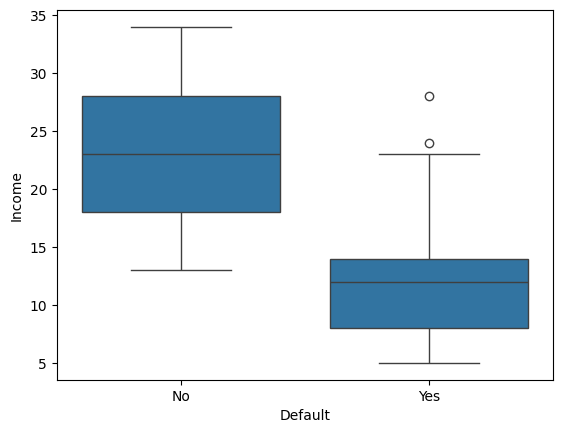

In [22]:
ax = sns.boxplot(data = loans, x = 'Default' , y = 'Income')

- Shows that the lower income group are more likely to default

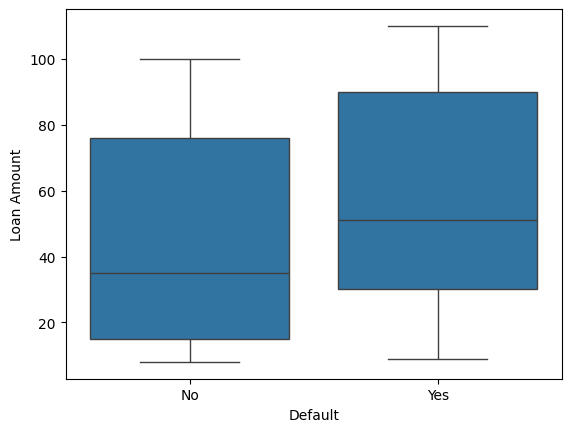

In [24]:
ax = sns.boxplot(data = loans, x = 'Default' , y = 'Loan Amount')

-  shows that the Higher the loan amount, more likely it might be defaulted

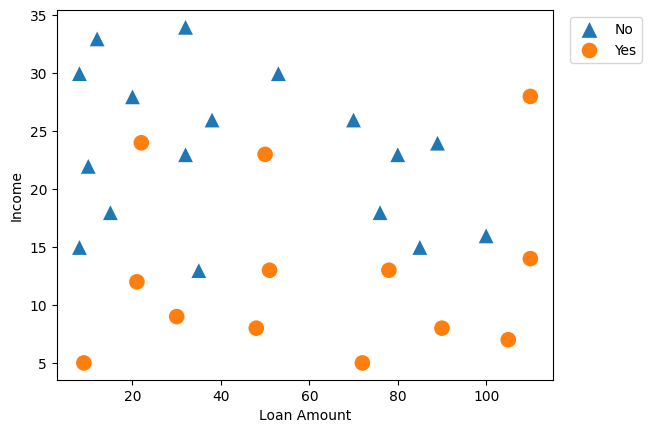

In [25]:
ax = sns.scatterplot(data = loans, 
                     x = 'Loan Amount', 
                     y = 'Income', 
                     hue = 'Default', 
                     style = 'Default', 
                     markers = ['^','o'], 
                     s = 150)
ax = plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left')

### Step 3.1 Comparision visualization

#### Scatter Plot

### Step 3.2 Relationship visualization

#### Scatter plot

### Step 3.3 Distribution visualization

#### Histogram

### Step 3.4 Composition visualization

----

## Module 4: DATA MODELLING

### Step 4.1 Prepare the Data: Split the data into dependent and independent variables

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
### Step 4.1.1 : Separate the dependent and independent variables

In [43]:
y = loans[['Default']] # Dependent Variable

In [44]:
X = loans[['Income','Loan Amount']] # Independent Variables

### Step 4.1.2 : Split the data

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=1234)


Split the data:

python
- X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=1234)

- train_size=0.8 means 80% of the data will be used for training, and 20% for testing.
- stratify=y ensures the split maintains the same proportion of classes as in the original dataset.
- random_state=1234 ensures reproducibility of the results.


This process helps in evaluating the model's performance on unseen data.

In [46]:
X_train.shape, X_test.shape

((24, 2), (6, 2))

In [47]:
### 4. Train and Evaluate the Classification Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 1234)

In [60]:
model = classifier.fit(X_test, y_test)

In [61]:
model.score(X_test, y_test)

1.0

### 5. Visualize the Classification Tree

In [65]:
from sklearn.tree import plot_tree

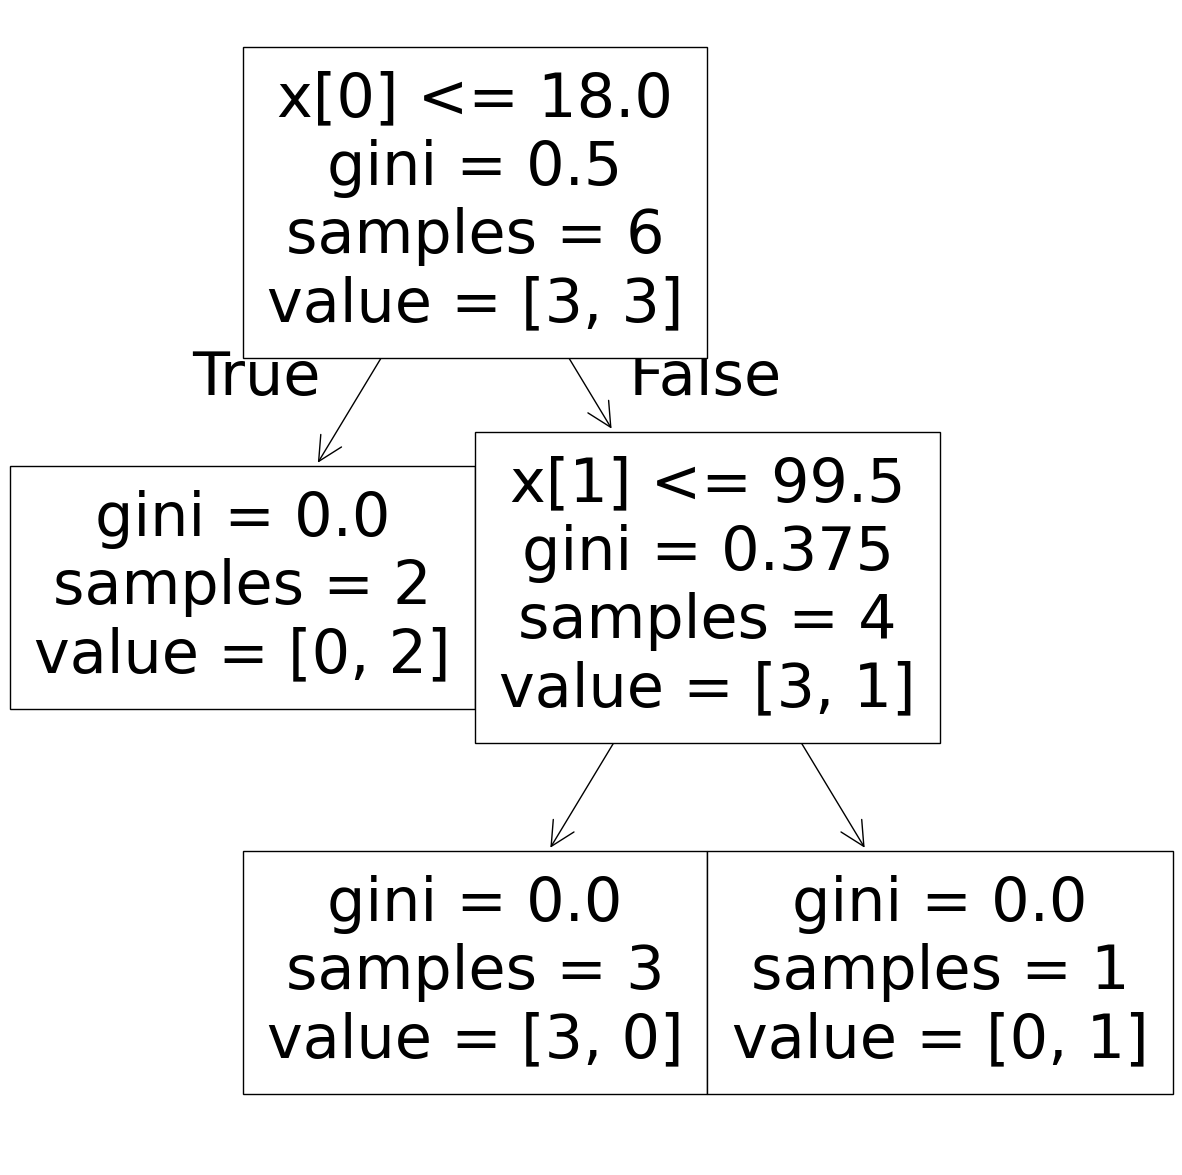

In [68]:
plt.figure(figsize = (15,15))
plot_tree(model);

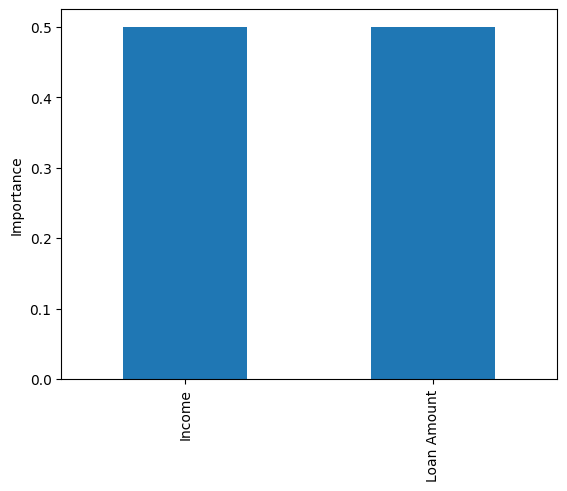

In [69]:
importance = model.feature_importances_
feature_importance = pd.Series(importance, index = X.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('Importance');

## Module 5: DATA OPTIMIZATION